In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
pred={}
perf={}
pred[0]=pd.read_csv('data\stock_NPA_k1.csv',header=0)['prediction']
perf[0]=pd.read_csv('data\stock_NPA_k1.csv',header=0)['rmse']
for i in range(1,5):
    pred[i]=pd.read_csv('data\stock_MATLAB_d'+str(i)+'.csv',header=None)[0]
    perf[i]=pd.read_csv('data\stock_MATLAB_d'+str(i)+'.csv',header=None)[1]

In [6]:
c=('#EEB422','#2171b5', '#4292c6', '#6baed6', '#9ecae1')
name=['our method k=1']+['least squares auto d='+str(i) for i in range(1,5)]

In [4]:
# read original time series
with open('stock-market.txt') as f:
    ts = [float(x.rstrip("\n")) for x in f.readlines()]

In [5]:
def nrmse(y,f):
    return (1-sum((y[i]-f[i])**2 for i in range(len(y)))/ sum((y[i]-np.mean(y))**2 for i in range(len(y))))*100

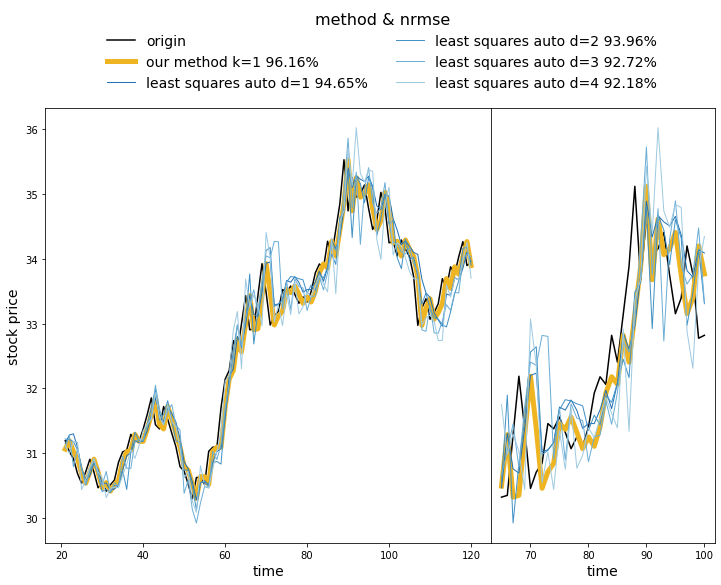

In [10]:
fig = plt.figure(figsize=(12,8))

ax=plt.subplot2grid((1,3),(0,0), rowspan=1, colspan=2)
time=[*range(21,121)]
plt.plot(time,ts[20:120],'black',label='origin')
for i in range(5):
    label=name[i]+' '+str(round(nrmse(ts[20:120],pred[i]),2))+'%'
    plt.plot(time,pred[i],color=c[i],linewidth=[1 if i>0 else 5][0],label=label) #,label=label

plt.xlabel('time',fontsize=14)
plt.ylabel('stock price',fontsize=14)
legend=plt.legend(bbox_to_anchor=(1.4,1.25),fontsize=14,frameon=False,ncol=2)
legend.set_title('method & nrmse') 
#title='method & nrmse',
plt.setp(legend.get_title(),fontsize=16)

ax=plt.subplot2grid((1,3),(0,2), rowspan=1, colspan=1)
time=[*range(65,101)]
plt.plot(time,ts[65:101],'black',label='origin')
for i in range(5):
    plt.plot(time,pred[i][65-21:101-21],color=c[i],linewidth=[1 if i>0 else 5][0],label=label) #,label=label
plt.yticks([])
plt.xlabel('time',fontsize=14)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0,hspace=0)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

plt.savefig('stock_ts100.pdf',bbox_inches = 'tight')